# IPL ESPN Cricinfo Team Standing Prediction ML Project

## Data Preprocessing

__Problem Statement:__
Given the performance statistics of an IPL player, predict what position might the player's team secure in that year.

> # Completion Table
| __TASKS__ | __STATUS__ |
| --- | --- |
| __Creating a Problem Statement__ | Completed |
| __Creating an Uncleaned Dataset__ | Completed |
| __Data Preprocessing__ | Completed |
| __Model Building*__| Incomplete |
| __Hyper Parameter Tuning__| Incomplete|
| __ROC Curve__| Incomplete|

__*__ Models to be created include __KNN, Logistic Regression, Decision Tree , Random Forest, SVM, Naive Bayes__

---
> # Classification Capstone Project Tasks
- Identifying a domain with a problem which can be addressed using Prediction Techniques.
- Creating a Dataset for classification with minimum 20 Features and 100 rows. The Data is scrapped from espn cricinfo's website.
- Ensure the dataset has all possible combination of feature where data preprocessing techniques can be applied ( Data Cleaning, Dimensionality Reduction, Data Transformation, Feature Engineering).
- Applying all the categories of classification algorithm( KNN, Logistic Regression, Decision Tree, Random Forest, SVM, Naïve Bayes) along with hyper parameter tuning and measure through best suited evaluation metric.
- Using the ROC curve to determine the best algorithm for your dataset.

---

# Data Pre-Processing

## Importing Required Libraries

In [597]:
import pandas as pd

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score


import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import re

## Importing Uncleaned Dataset
I am importing the uncleaned dataset to avoid time-heavy dataset creation process through webscrapping

In [598]:
# using .read_csv() of pandas to import the dataset
df = pd.read_csv("/Users/shreyansh/Documents/Projects (Github)/ipl_prediction_ml_project/uncleaned_dataset.csv")
df.sample(5)

,player_name,team,year,matches_played,innings_bowled,overs_bowled,maidens_earned,runs_conceded,wickets_taken,best_innings_bowling,...,highest_score,batting_average,balls_faced,batting_strike_rate,hundreds_scored,fifties_scored,ducks_scored,fours_scored,sixes_scored,TARGET(position)
945,CJ Anderson,Delhi Capitals,2017,11,8.0,18.5,0.0,186.0,3.0,1/23,...,41*,20.28,123.0,115.44,0.0,0.0,1.0,8.0,9.0,6th
1217,J Theron,Punjab Kings,2010,7,7.0,24.0,0.0,187.0,6.0,2/17,...,2,1.00,5.0,40.00,0.0,0.0,1.0,0.0,0.0,8th
7,B Akhil,Royal Challengers Bangalore,2008,7,6.0,17.2,0.0,134.0,2.0,2/17,...,27*,15.33,31.0,148.38,0.0,0.0,1.0,4.0,3.0,7th
2004,SS Iyer,Delhi Capitals,2017,12,NaN,NaN,NaN,NaN,NaN,NaN,...,96,33.80,243.0,139.09,0.0,2.0,0.0,36.0,10.0,6th
241,JA Morkel,Chennai Super Kings,2011,15,14.0,45.0,1.0,382.0,15.0,3/29,...,30*,23.00,102.0,135.29,0.0,0.0,1.0,8.0,8.0,1st


## Handling NA Values

#### Understanding NaN Distribution

In [599]:
df.isna().sum()

player_name               0
team                      0
year                      0
matches_played            0
innings_bowled          783
overs_bowled            783
maidens_earned          783
runs_conceded           783
wickets_taken           783
best_innings_bowling    783
bowling_average         783
economy_rate            783
bowling_strike_rate     783
four_wickets            783
five_wickets            783
innings_batted          213
not_outs                213
runs_scored             213
highest_score           213
batting_average         213
balls_faced             213
batting_strike_rate     213
hundreds_scored         213
fifties_scored          213
ducks_scored            213
fours_scored            213
sixes_scored            213
TARGET(position)          0
dtype: int64

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

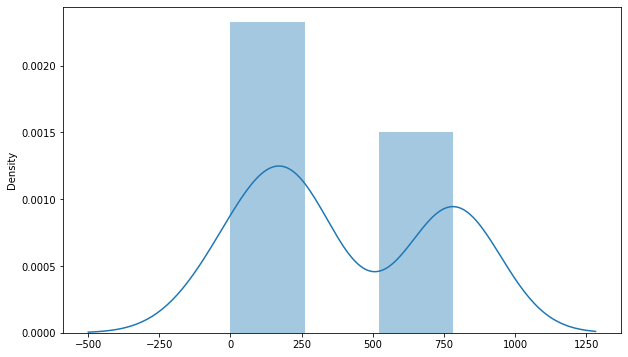

In [600]:
plt.figure(figsize=(10,6))
sns.distplot(df.isna().sum())

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

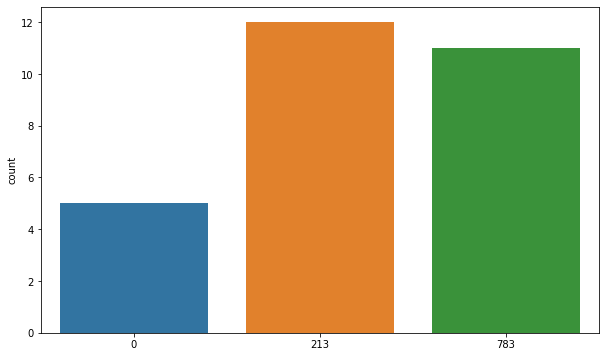

In [601]:
plt.figure(figsize=(10,6))
sns.countplot(df.isna().sum())

#### Bowling Stats Columns with NaN Values

Total Number of rows where innings_bowled and subsequent bowling columns are NaN:  783
33.82% of rows have NaN values in innings_bowled column and subsequently all other bowling columns are NaN as well.


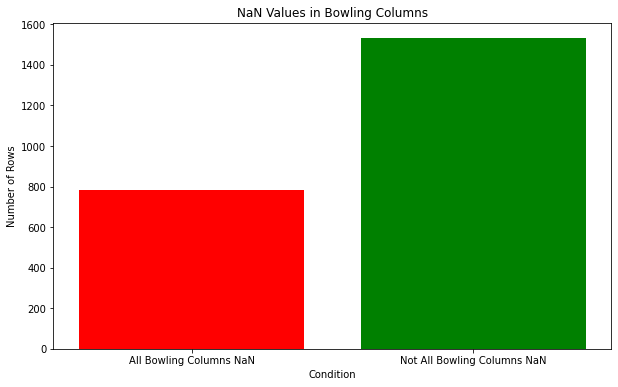

In [602]:
# Check if innings_bowled is NaN and if all other bowling related columns are NaN as well
bowling_cols = ['overs_bowled', 'maidens_earned', 'runs_conceded', 'wickets_taken', 'best_innings_bowling',
                'bowling_average', 'economy_rate', 'bowling_strike_rate', 'four_wickets', 'five_wickets']

null_cond = df['innings_bowled'].isnull() & df[bowling_cols].isnull().all(axis=1)
null_rows = df[null_cond]
print("Total Number of rows where innings_bowled and subsequent bowling columns are NaN: ", len(null_rows))

# Calculate the percentage of rows where all bowling columns are NaN
null_percent = round((len(null_rows) / len(df)) * 100, 2)

print(f"{null_percent}% of rows have NaN values in innings_bowled column and subsequently all other bowling columns are NaN as well.")

# Visualize the findings
plt.figure(figsize=(10,6))
plt.bar(["All Bowling Columns NaN", "Not All Bowling Columns NaN"], 
        [len(null_rows), len(df) - len(null_rows)], color = ["red","green"])
plt.title("NaN Values in Bowling Columns")
plt.xlabel("Condition")
plt.ylabel("Number of Rows")
plt.show()


#### Bowling Stats Columns with NaN Values

In [603]:
# Check if innings_batted is NaN and if all other batting related columns are NaN as well
batting_cols = ['not_outs', 'runs_scored', 'highest_score',
                'batting_average', 'balls_faced', 'batting_strike_rate',
                'hundreds_scored', 'fifties_scored', 'ducks_scored', 
                'fours_scored', 'sixes_scored']

#Subset of all coluumns where inning batted is NA
nan_rows = df[df['innings_batted'].isna()]

#Checking if all batting columns are NA in the subset created
all_batting_nan = nan_rows[batting_cols].isna().all(axis=1).all()

if all_batting_nan:
    print("All batting columns are NaN when innings_batted is NaN.")
    
else:
    print("There are non-NaN values in batting columns when innings_batted is NaN")

All batting columns are NaN when innings_batted is NaN.


### Filling NaN values with 0

#### Inference (Reasoning)
After analyzing the missing values for both batting and bowling columns, I have found that if a player has not batted or bowled in a particular season, all of their corresponding batting and bowling columns have missing values. Hence, it is reasonable to assume that these missing values are not actual values but rather an indication that the player did not bat or bowl in those matches. Therefore, I will fill all of these missing values with 0, which is a common practice in such cases, and an accurate depiction.

In [604]:
#Filling all na values in the dataset with 0
df.fillna(0, inplace=True)

In [605]:
#Checking whether there are any remaining NA values
df.isna().sum().all()

False

## Adding a new column 'total_ipl_experience' 
The column will be created on the basis of how many times has a player name been repeated in the dataset.

In [606]:
tot_exp_arr = df.groupby('player_name')['player_name'].transform('count')
df.insert(3, 'total_ipl_experience', tot_exp_arr)
df.sample(3)

,player_name,team,year,total_ipl_experience,matches_played,innings_bowled,overs_bowled,maidens_earned,runs_conceded,wickets_taken,...,highest_score,batting_average,balls_faced,batting_strike_rate,hundreds_scored,fifties_scored,ducks_scored,fours_scored,sixes_scored,TARGET(position)
398,SC Ganguly,Kolkata Knight Riders,2010,5,14,3.0,4.0,0.0,43.0,0.0,...,88,37.92,419.0,117.66,0.0,4.0,1.0,58.0,15.0,6th
543,PJ Cummins,Kolkata Knight Riders,2022,6,5,5.0,19.5,0.0,212.0,7.0,...,56*,15.75,24.0,262.50,0.0,1.0,2.0,5.0,6.0,7th
1486,R Sharma,Pune Warriors India,2012,4,11,11.0,37.0,0.0,300.0,9.0,...,2,0.50,11.0,18.18,0.0,0.0,3.0,0.0,0.0,9th


## Removing "*" or not out symbol from highest score of players

In [607]:
cleaned_highest_score = []
#iterating through the highest score column
for i in df.highest_score:
    i = str(i)
    if i[-1]=="*":
        cleaned_highest_score.append(i[:-1])
    else:
        cleaned_highest_score.append(i)

df["highest_score"] = cleaned_highest_score

## Replacing '-' with 0 for any column in the dataset (Using regular expressions)

In [608]:
df = df.replace('-', 0)

## Changing object datatypes of columns to int/float as and where required

In [609]:
#object to float
float_conv_columns = ["bowling_average", "bowling_strike_rate",
                     "batting_average", "batting_strike_rate"]

# looping through the columns and convert their datatype to float
for col in float_conv_columns:
    df[col] = df[col].astype(float)

In [610]:
#object to int
int_convert_columns = ["highest_score"]

# looping through the columns and convert their datatype to integer
for col in int_convert_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')

## Encoding Year Feature (Ordinal Encoding)

In [611]:
oe = OrdinalEncoder()
df['year'] = oe.fit_transform(df[['year']])

## Encoding Team Feature (Label Encoding)

The team name is a relevant feature for predicting the target variable (position a team finished). Keeping this feature will will help our machine learning algorithm to learn the patterns and correlations between team names and their final positions in the IPL.<br>

It is true that some teams may have never finished first in the IPL, but that does not mean that the team name is not informative for predicting the final position. In fact, the performance of a team over the years can be an important factor that affects its final position, and this information can be captured through the team name feature.

In [612]:
le = LabelEncoder()
df['team'] = le.fit_transform(df[['team']])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Dropping Redundant Columns

### Dropping Best Bowling Figures for an Innings
This column has values like 3/20 or 4/15, representing such a numeric value is impossible, and can't be comprehended by the machine. The machine will look at it as string or categories, which is useless, and not accurate.

In [613]:
df.drop('best_innings_bowling', axis=1, inplace=True)

### Dropping Player Name
As the player name does not have any impact on the position the team finished in, and as its a string value, we are dropping the same.

In [614]:
df.drop('player_name', axis=1, inplace=True)

## Working with the Target Variable

In [615]:
#Target Value Counts
df["TARGET(position)"].value_counts()

6th     306
8th     277
7th     276
5th     274
2nd     267
1st     263
3rd     238
4th     206
9th      90
SF       74
10th     44
Name: TARGET(position), dtype: int64

### Replacing 'SF' in TARGET variable, to 3rd
As in the year's 2008 and 2009, there were no eliminators, the semifinalist who got knocked out were not adjourned 3rd or 4th. To solve this problem we are awarding both of them as 3rd.

In [616]:
#Replacing Semifinalist as 3rd
df = df.replace({'SF': '3rd'}, regex=True)

### Ordinal Encoding the target variable

In [617]:
oe = OrdinalEncoder()

# Fit and transform the data
df['TARGET(position)'] = oe.fit_transform(df[['TARGET(position)']])

### Renaming Target(position) column to just Target

In [618]:
df.rename(columns = {'TARGET(position)':'Target'}, inplace = True)

## Scaling (Robust Scaling) the data 

__This is also an outlier removal or smoothening technique__

Robust scaling is a good choice for these columns because it is a method of scaling that is not affected by outliers in the data. As some of these columns represent performance metrics in cricket, such as runs scored or wickets taken, it is possible that there may be outliers in the data due to particularly exceptional performances. By using robust scaling, these outliers will not disproportionately affect the scaling of the data.<br>

Additionally, robust scaling is a good choice when the data is not normally distributed, as it uses the median and interquartile range instead of the mean and standard deviation. Since the distribution of performance metrics in cricket may not be normal, robust scaling can help to ensure that the scaling is more appropriate for the data.

In [619]:
#Dropping the target variable
X = df.drop("Target",axis=1)

# Initialize a RobustScaler object
rs = RobustScaler()

# Fit the scaler to the data
rs.fit(X)

# Transform the data using the scaler
X_scaled = rs.transform(X)

# Create a new DataFrame from the scaled data
df_pp = pd.DataFrame(X_scaled, columns=X.columns)

df_pp["Target"] = df['Target']

In [637]:
df_pp.sample(3)

,overs_bowled,bowling_strike_rate,not_outs,bowling_average,year,wickets_taken,maidens_earned,innings_batted,runs_scored,fifties_scored,runs_conceded,matches_played,balls_faced,fours_scored,team
1291,-0.128480,0.254386,-0.5,0.894651,0.000000,0.000000,0.0,-0.500,-0.205882,0.0,-0.036458,-0.7,-0.231660,-0.214286,0.125
2097,-0.256959,-0.535088,-0.5,-0.540444,-0.142857,-0.166667,0.0,-0.375,-0.194118,0.0,-0.265625,-0.7,-0.162162,-0.214286,0.250
153,1.850107,0.184211,0.0,0.158839,0.571429,2.833333,1.0,-0.125,-0.170588,0.0,1.744792,0.6,-0.108108,-0.214286,0.500


In [649]:
# Create PCA object and fit the data
pca = PCA(n_components=10)
principal_components = pca.fit_transform(df_pp)

df_pca = pd.DataFrame(principal_components,
            columns = ["PC1","PC2","PC3","PC4","PC5",
                      "PC6","PC7","PC8","PC9","PC10"])

df_pca["Target"] = df_pp_target 

In [650]:
df_pca.sample(7)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Target
1342,-1.341442,-1.294568,0.752588,-0.311662,0.579349,-0.073554,0.110350,0.004619,0.189957,0.104530,6.0
589,2.871949,1.397743,0.979301,0.488209,-0.057659,-0.065279,-0.179482,-0.069166,-0.168415,0.196629,1.0
1453,-1.500313,0.026060,0.406259,-0.102376,0.100444,0.686786,0.073458,-0.156892,0.000738,-0.037137,7.0
644,-2.570082,3.313326,-1.888115,-2.005893,0.408848,-0.020531,-0.143920,2.134460,0.125252,0.632335,1.0
43,-2.095979,2.411046,-0.512301,-1.255063,-0.624981,-0.841906,-0.270477,0.384873,-0.334882,-0.527785,2.0
1806,-0.955354,-1.932924,-0.423956,-0.249213,0.631984,0.449959,0.121095,0.031318,0.071057,-0.037198,5.0
2001,-0.641324,-1.789531,-0.446204,-0.129728,-0.055679,0.782637,-0.094515,0.036996,-0.023763,-0.011482,6.0


## Exporting (PCA) pre-processed dataset

In [658]:
df_pca.to_csv("pre_processed_dataset.csv")